In [8]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [9]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "learning_rate"
tags = ["learning_rate"]
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [10]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 60/60 [00:00<00:00, 79.27it/s]


,Self_Play/Mean_Reward,Self_Play/Total_Average_Reward,Self_Play/Max_Reward,_timestamp,Self_Play/Min_Timesteps,Self_Play/Timesteps_STD,Self_Play/Total_Runtime,max_Self_Play/Mean_Reward,_wandb,Self_Play/Mean_Entropy,...,expansion_policy,n_steps_learning,selection_policy,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,regularization_weight,tree_evaluation_policy,replay_buffer_multiplier
0,-153.375,-172.033333,-89,1.707255e+09,89,52.049256,62863,-144.625,{'runtime': 562},0.965809,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
1,-181.625,-191.966667,-51,1.707254e+09,51,55.705219,560768,-158.250,{'runtime': 590},0.964062,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
2,-152.500,-176.691667,-62,1.707253e+09,62,54.756604,896239,-144.875,{'runtime': 618},0.957166,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
3,-169.000,-183.508333,-79,1.707253e+09,79,51.826634,187115,-156.125,{'runtime': 598},0.967869,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
4,-17.000,-101.025000,-17,1.707252e+09,17,0.000000,955215,-17.000,{'runtime': 366},0.080699,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
5,-212.375,-206.316667,-200,1.707252e+09,200,0.000000,654212,-180.750,{'runtime': 576},0.673285,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
6,-25.250,-117.858333,-19,1.707251e+09,19,7.285014,906997,-15.000,{'runtime': 434},0.393724,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
7,-19.500,-155.958333,-17,1.707251e+09,17,2.000000,520205,-16.750,{'runtime': 446},0.286700,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
8,-180.000,-78.741667,-79,1.707250e+09,79,43.031550,71790,-15.000,{'runtime': 277},0.880315,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
9,-56.500,-73.283333,-26,1.707250e+09,26,31.959796,716790,-16.500,{'runtime': 244},0.698875,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10


In [11]:
df.columns

Index(['Self_Play/Mean_Reward', 'Self_Play/Total_Average_Reward',
       'Self_Play/Max_Reward', '_timestamp', 'Self_Play/Min_Timesteps',
       'Self_Play/Timesteps_STD', 'Self_Play/Total_Runtime',
       'max_Self_Play/Mean_Reward', '_wandb', 'Self_Play/Mean_Entropy',
       'Training/Value_Simularities', 'Training/Value_and_Policy_loss',
       'max_Self_Play/Mean_Reward_step', 'Self_Play/Timesteps',
       'Self_Play/Rewards', 'Self_Play/Min_Reward', '_runtime',
       'Self_Play/EMA_Reward', 'Training/Policy_loss',
       'Self_Play/Total_Timesteps', 'Self_Play/Runtime_per_Timestep',
       'Self_Play/Entropies', 'Self_Play/Cumulative_Reward',
       'Training/Regularization_loss', 'Self_Play/Reward_STD',
       'Training/Value_loss', 'Training/Learning_Rate',
       'Self_Play/Mean_Timesteps', 'Training/Replay_Buffer_Size', '_step',
       'env_id', 'layers', 'puct_c', 'lr_gamma', 'eval_param', 'hidden_dim',
       'iterations', 'model_type', 'norm_layer', 'activation_fn',
      

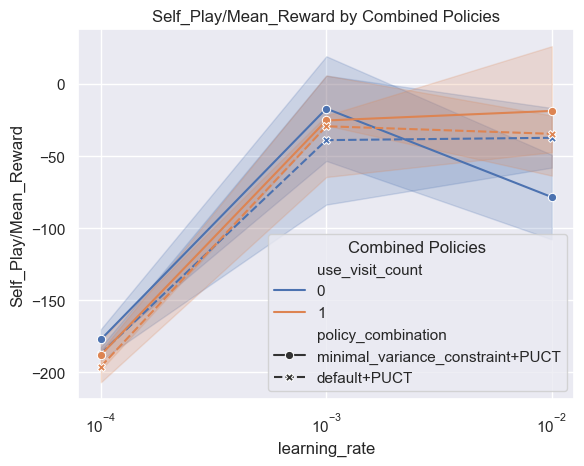

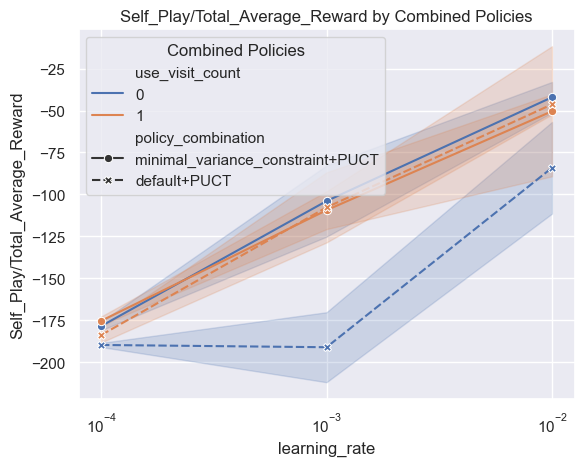

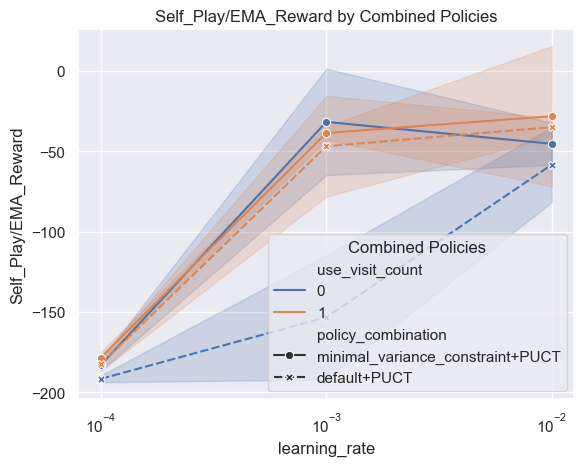

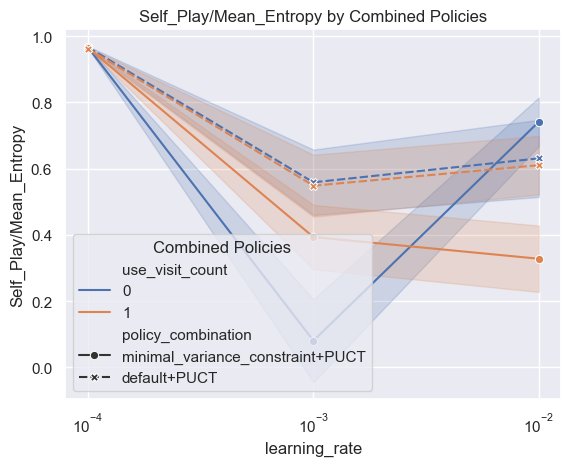

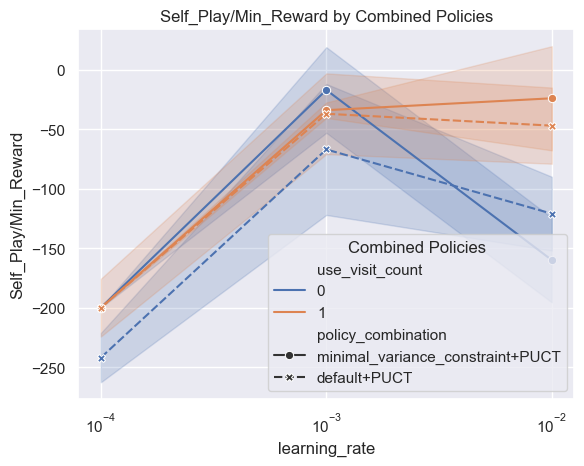

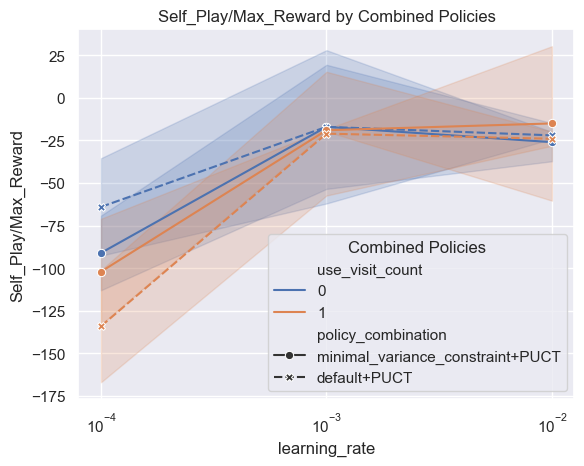

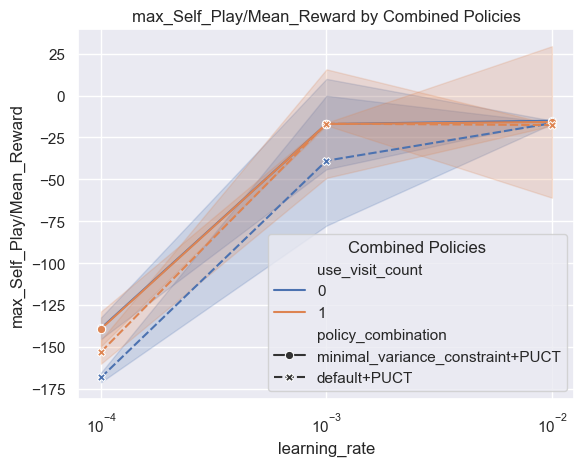

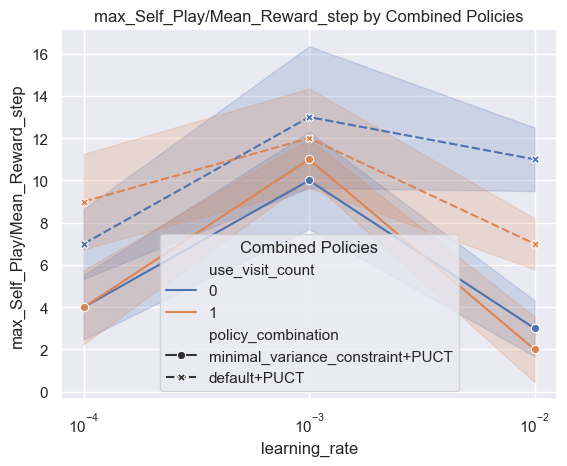

In [15]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Reward', "Self_Play/Total_Average_Reward", "Self_Play/EMA_Reward", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Reward',
           'Self_Play/Max_Reward',
           'max_Self_Play/Mean_Reward', 'max_Self_Play/Mean_Reward_step'
           ]

for metric in metrics:
    sns.set_theme(style="darkgrid")

    # Create a line plot with confidence intervals
    sns.lineplot(data=df, x=x_metric, y=metric,
                hue="use_visit_count", style="policy_combination",
                markers=True, errorbar="se", estimator=np.median)

    # Customize the plot with titles and labels
    plt.title(f'{metric} by Combined Policies')
    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(metric)
    plt.legend(title='Combined Policies')
    plt.gca().set_xscale('log', base=10)

    # Show the plot
    plt.show()
